# Using Velocity Verlet for 3-body problem

In [1]:
import numpy as np

def getForces(x):
    """Function to calculate the forces for 3 particles interacting through 
    the gravitational forces (where G=M_1=M_2=M_3=1)"""
    #3 particles * 3 coordinates 
    F=np.zeros((3,3))
    #python starts indexing from 0
    F[0]=-(x[0]-x[1])/np.linalg.norm(x[0]-x[1])**3 - (x[0]-x[2])/np.linalg.norm(x[0]-x[2])**3
    F[1]=-(x[1]-x[0])/np.linalg.norm(x[1]-x[0])**3 - (x[1]-x[2])/np.linalg.norm(x[1]-x[2])**3
    F[2]=-(x[2]-x[1])/np.linalg.norm(x[2]-x[1])**3 - (x[2]-x[0])/np.linalg.norm(x[2]-x[0])**3
    return F

def velocityVerlet(x_old,v_old,deltaT):
    """Function that calculates the new x and v using the Velocity Verlet algorithm"""
    #reshape array from 1x9 to 3x3
    x_old=x_old.reshape((3,3))
    v_old=v_old.reshape((3,3))
    
    #calculate new position and velocity
    F_old=getForces(x_old)
    x_new=x_old+deltaT*v_old+deltaT**2/2*F_old
    F_new=getForces(x_new)
    v_new=v_old+deltaT/2*(F_old+F_new)
    
    #reshape 3x3 to 1x9
    x_new=x_new.reshape((1,9))
    v_new=v_new.reshape((1,9))
    
    return x_new,v_new 

Set special initial conditions

In [2]:
#set initial positions
x=np.zeros((3,3))
x[0]=[0.97000436,-0.24308753,0]
x[1]=-x[0]
x[2]=[0,0,0]

#set initial velocities
v=np.zeros((3,3))
v[2]=[-0.93240737,-0.86473146,0]
v[0]=-v[2]/2.
v[1]=-v[2]/2.

Set timestep as 0.01s and initialize arrays

In [3]:
#define timestep as 0.01s
deltaT=0.01

#initialize arrays (1,000 timesteps*0.01s=10s total time)
pos=np.zeros((1000,9))
vel=np.zeros((1000,9))

To save results easily, we will convert the 3x3 position and velocity array to 1x9 arrays

In [4]:
#reshape from 3x3 to 1x9 so that we can save as 2D array
pos[0]=x.reshape((1,9))
vel[0]=v.reshape((1,9))   

Iterate 1000 times

In [5]:
#iterate 1,000 times, saving all results
for i in range(1,1000):
    pos[i],vel[i]=velocityVerlet(pos[i-1],vel[i-1],deltaT) 

Let's plot the trajectories for all 3 particles

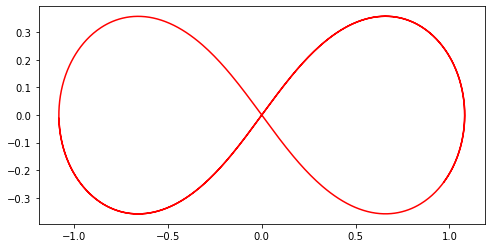

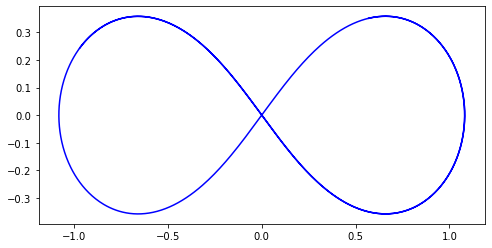

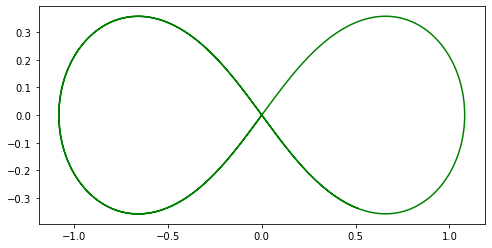

In [6]:
#load plotting library
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 4)

#plot all x and y coordinates of first particle
plt.plot(pos[:,0],pos[:,1],'r')
plt.show()

#plot all x and y coordinates of second particle
plt.plot(pos[:,3],pos[:,4],'b')
plt.show()

#plot all x and y coordinates of third particle
plt.plot(pos[:,6],pos[:,7],'g')
plt.show()


Need some code to animate the trajectories of the three particles

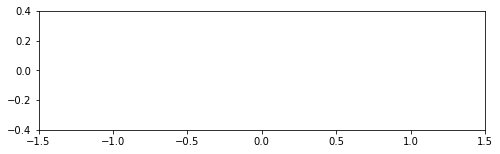

In [7]:
#load animation functionality
from matplotlib.animation import FuncAnimation

fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal', autoscale_on=False, xlim=(-1.5, 1.5), ylim=(-0.4, 0.4))

particle1 = ax.plot([], [], 'r.',markersize=20)[0]
particle2 = ax.plot([], [], 'b.',markersize=20)[0]
particle3 = ax.plot([], [], 'g.',markersize=20)[0]
def init():
    particle1.set_data([], [])
    particle2.set_data([], [])
    particle3.set_data([], [])
    return particle1, particle2, particle3

def animate(i):
    particle1.set_data(pos[i,0], pos[i,1])
    particle2.set_data(pos[i,3], pos[i,4])
    particle3.set_data(pos[i,6], pos[i,7])
    return particle1,particle2, particle3
        
anim = FuncAnimation(fig, animate, init_func=init, frames=1000, interval=50, blit=True)

Finally, generate a nice animation!

In [8]:
from IPython.display import HTML

HTML(anim.to_html5_video())

In [ ]:
#anim.save('3body.mp4', codec='h264')